In [2]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time
import random

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
n_samples, h, w = lfw_people.images.shape

In [5]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [6]:
X

array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
        0.3803922 ],
       [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
        0.53594774],
       [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
        0.7163399 ],
       ...,
       [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
        0.19346406],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
        0.6117647 ],
       [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
        0.2535948 ]], shape=(1288, 1850), dtype=float32)

In [6]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

Colin Powell


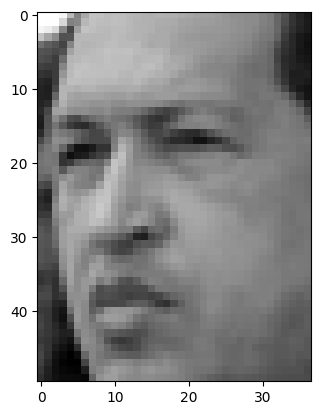

In [7]:
teste = 1001
print(target_names[y[teste]])
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

___

Modelo sem PCA

In [10]:
start_time = time.time()

distances = np.sqrt(((X_test[:,np.newaxis] - X_train) ** 2).sum(axis=2))
nearest_neighbor = np.argmin(distances, axis=1)
predicted_labels = y_train[nearest_neighbor]

duration_no_pca = time.time() - start_time
print(f'Executar sem o PCA demorou {duration_no_pca:.2f} segundos.')

Executar sem o PCA demorou 1.73 segundos.


Modelo com PCA

In [20]:
pre_PCA = PCA(n_components=X_train.shape[0])
pre_PCA.fit(X_train)

PCA(n_components=966)

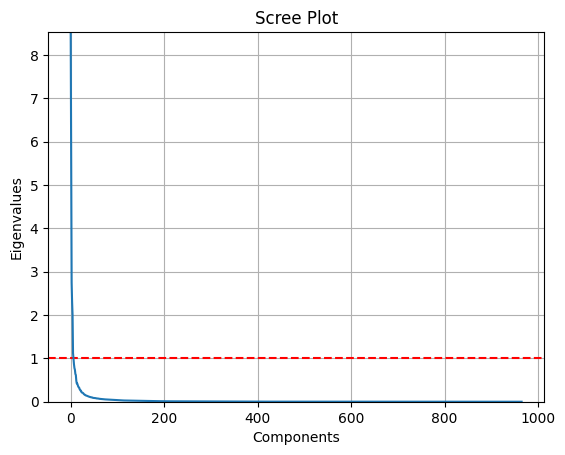

In [24]:
plt.title('Scree Plot')
plt.ylabel('Eigenvalues')
plt.xlabel('Components')

plt.ylim(0, max(pre_PCA.explained_variance_))
plt.axhline(y=1, color='r', linestyle='--')

plt.plot(pre_PCA.explained_variance_)
plt.grid(True)
plt.show()

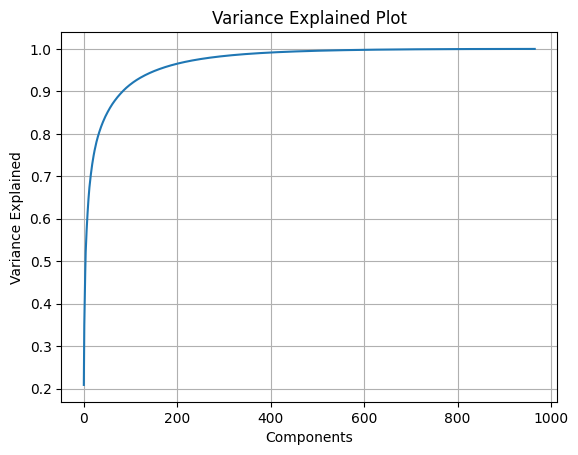

In [42]:
var = np.cumsum(pre_PCA.explained_variance_ratio_)

plt.title('Variance Explained Plot')
plt.ylabel('Variance Explained')
plt.xlabel('Components')

plt.plot(var)
plt.grid(True)
plt.show()

c:\Users\Vinicius\Documents\dev\algoritmos-academy\pca\venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Vinicius\Documents\dev\algoritmos-academy\pca\venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


3


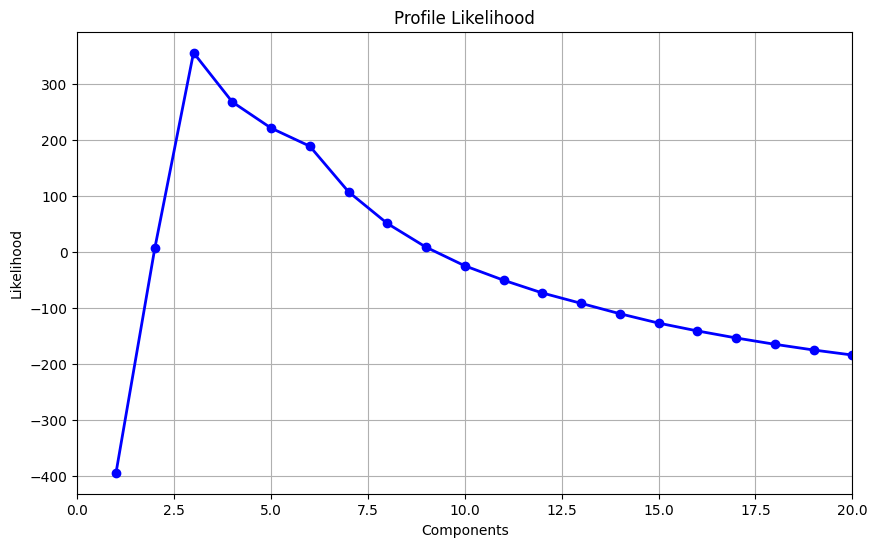

In [41]:
from scipy.stats import norm

# log_likelihood = None

log_likelihoods = []

def calculate_profile_likelihood(eigenvalues):
    L_max = len(eigenvalues)
    epsilon = 1e-10

    for L in range(0, L_max):
        mu1 = np.mean(eigenvalues[:L])
        mu2 = np.mean(eigenvalues[L:])
        var = ( np.sum((eigenvalues[:L] - mu1) ** 2) +  np.sum((eigenvalues[L:] - mu2) ** 2) ) / L_max + epsilon

        ll1 = np.sum(norm.logpdf(eigenvalues[:L], loc=mu1, scale=np.sqrt(var)))
        ll2 = np.sum(norm.logpdf(eigenvalues[L:], loc=mu2, scale=np.sqrt(var)))
        total_ll = ll1 + ll2

        log_likelihoods.append(total_ll)

    return np.argmax(log_likelihoods) + 1

best_value_component = calculate_profile_likelihood(pre_PCA.explained_variance_)
print(best_value_component)

plt.figure(figsize=(10,6))
plt.title('Profile Likelihood')
plt.xlabel('Components')
plt.ylabel('Likelihood')
plt.xlim(0, 20)
plt.grid(True)

plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, 'o-', linewidth=2, color='blue')

plt.show()

In [ ]:
n_components=150 

pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [14]:
start_time = time.time()

distances = np.sqrt(((X_test_PCA[:,np.newaxis] - X_train_PCA) ** 2).sum(axis=2))
nearest_neighbor = np.argmin(distances, axis=1)
predicted_labels = y_train[nearest_neighbor]

duration_w_pca = time.time() - start_time
print(f'Executar sem o PCA demorou {duration_w_pca:.2f} segundos.')

Executar sem o PCA demorou 0.13 segundos.


In [19]:
print("O algoritmo com PCA executou {:.2f} vezes mais rápido.".format(duration_no_pca / duration_w_pca))

O algoritmo com PCA executou 13.87 vezes mais rápido.
